In [129]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import TimeDistributed
from statsmodels.graphics.tsaplots import plot_acf
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')
import tsaug
from tsaug import AddNoise, Convolve, Crop, Drift, Pool, Quantize, Resize, Reverse, TimeWarp

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.4


In [130]:
test_size = 0.1

In [131]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [132]:
dataset_x = np.load('/kaggle/input/datasethomework2/training_dataset_homework2/x_train.npy')
dataset_y = np.load('/kaggle/input/datasethomework2/training_dataset_homework2/y_train.npy')
print(dataset_x.shape)
print(dataset_y.shape)


k = 0
n = 0
class_count = {0:0 ,1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0 ,9:0, 10:0, 11:0}
for i in range(dataset_y.shape[0]):
    if dataset_y[i]!=n :
        class_count[n] = k
        n=dataset_y[i]
        k=1
    else :
        k+=1
class_count[n] = k

print(class_count)


(2429, 36, 6)
(2429,)
{0: 34, 1: 123, 2: 270, 3: 381, 4: 62, 5: 153, 6: 313, 7: 68, 8: 120, 9: 777, 10: 77, 11: 51}


In [133]:
print(dataset_x[0][0][5].dtype)

float64


In [134]:
classes = 12

In [135]:
class_test = {0:0 ,1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0 ,9:0, 10:0, 11:0}
num_classes = 12
for i in range (num_classes):
    class_test[i] = int(class_count[i] * test_size)
print (class_count)
print (class_test)

test_array = []
k = 0
for i in range (num_classes):
    k += class_count[i]
    for j in range (k - class_test[i], k):
        test_array.append(j)

print(test_array)


{0: 34, 1: 123, 2: 270, 3: 381, 4: 62, 5: 153, 6: 313, 7: 68, 8: 120, 9: 777, 10: 77, 11: 51}
{0: 3, 1: 12, 2: 27, 3: 38, 4: 6, 5: 15, 6: 31, 7: 6, 8: 12, 9: 77, 10: 7, 11: 5}
[31, 32, 33, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 864, 865, 866, 867, 868, 869, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1398, 1399, 1400, 1401, 1402, 1403, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 2224, 2225, 

In [136]:
x_test = []
for i in test_array:
    x_test.append(dataset_x[i])
#print(x_test)

y_test = []
for i in test_array:
    y_test.append(dataset_y[i])
    
#print(y_test)
#print (len(x_test))
#print (len(y_test))

x_train = []
for i in range(dataset_x.shape[0]): 
    if i not in test_array:
        x_train.append(dataset_x[i])
#print(x_test)

y_train = []
for i in range (dataset_y.shape[0]):
    if i not in test_array:
        y_train.append(dataset_y[i])

x_train_raw = np.array(x_train)
x_test_raw = np.array(x_test)
y_train_raw = np.array(y_train)
y_test_raw = np.array(y_test)

print(y_train_raw)
print(y_test_raw)


[ 0  0  0 ... 11 11 11]
[ 0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11]


In [137]:
print(x_train_raw[0][0])
x_train = x_train_raw.reshape(78840, 6)
y_train = y_train * 36
y_train.sort()
y_train = np.array(y_train)
print(y_train.shape)
print(x_train[0])

x_test = x_test_raw.reshape(8604, 6)
y_test = y_test * 36
y_test.sort()
y_test = np.array(y_test)

[ 17.597    8.1713  -1.7842 -19.706   -9.7135 -61.887 ]
(78840,)
[ 17.597    8.1713  -1.7842 -19.706   -9.7135 -61.887 ]


In [138]:
print(x_train.shape)
print(y_train.shape)
#Add random nois to train set
X_aug = tsaug.AddNoise(scale=0.1).augment(x_train)
#Add noised data to original train set
x_train = np.append(X_aug, x_train, axis=0)
x_train_final = np.c_[x_train, np.append(y_train, y_train)]
print(x_train_final.shape)
print(x_train_final)


x_test_final = np.c_[x_test, y_test]
print(x_test_final.shape)
print(x_test_final)

(78840, 6)
(78840,)
(78840, 7)
[[ 17.597     8.1713   -1.7842  ...  -9.7135  -61.887     0.     ]
 [  0.22974  -5.8956   16.837   ...   2.4332   58.914     0.     ]
 [-29.654   -21.296    29.103   ...  75.391    10.665     0.     ]
 ...
 [ 18.05      0.25215  -0.14744 ...  -3.6254   45.904    11.     ]
 [ 15.992     0.45727   2.5089  ...  -4.8006   -2.9892   11.     ]
 [  8.269     0.26171   2.1904  ...  -2.417    25.179    11.     ]]
(8604, 7)
[[ 1.0272e+01  4.1752e+01  9.5739e+01 ...  1.9374e+02  2.1600e+02
   0.0000e+00]
 [ 1.4161e+01  5.9318e+01  1.4704e+02 ...  2.9472e+02  3.4585e+02
   0.0000e+00]
 [ 1.1972e+01  6.0059e+01  1.5632e+02 ...  3.1531e+02  3.4915e+02
   0.0000e+00]
 ...
 [ 2.0638e-01  1.0287e+00 -9.2512e-01 ...  1.7333e+00  4.7638e+00
   1.1000e+01]
 [ 4.1429e+00  1.0939e+00 -1.8921e-01 ...  9.3441e-01  4.1742e+00
   1.1000e+01]
 [-1.5545e+00 -1.2121e+00  1.0705e+00 ...  2.4010e+00  8.4550e+00
   1.1000e+01]]


In [139]:
df_train = pd.DataFrame(x_train_final)
df_test = pd.DataFrame(x_test_final)

In [140]:
print(df_train[df_train[6] == 0][[0, 1, 2, 3, 4, 5]])

             0        1         2         3        4        5
0     17.59700   8.1713  -1.78420 -19.70600  -9.7135 -61.8870
1      0.22974  -5.8956  16.83700   5.03900   2.4332  58.9140
2    -29.65400 -21.2960  29.10300  -0.47503  75.3910  10.6650
3    -59.21000 -29.5650  17.97100 -45.60600  19.4120 -43.0140
4    -72.06400 -25.8550   0.46536 -59.15100 -29.1050 -11.9130
...        ...      ...       ...       ...      ...      ...
1111   2.63270  29.2970 -18.84800  78.17200   7.8217  76.5080
1112  -5.80340  31.5720  -3.13010   4.94050 -10.4450 -34.4960
1113 -10.08000   6.4245  14.95700 -72.53100   2.9887  10.6080
1114  -9.31060 -16.1350   4.39040  -5.65150  -8.9225   1.5026
1115  -5.00080 -15.8280  -5.46590  45.59700  30.1980  40.3460

[1116 rows x 6 columns]


In [141]:
def inspect_activity(activity, df):
    data = df[df[6] == activity][[0, 1, 2, 3, 4, 5]][:500]
    axis = data.plot(subplots=True, figsize=(17, 9))
    plt.title("Activity #{}".format(activity), y=7.55)
    for ax in axis:
        ax.legend(loc='lower right')

**DATA VISUALIZATION**

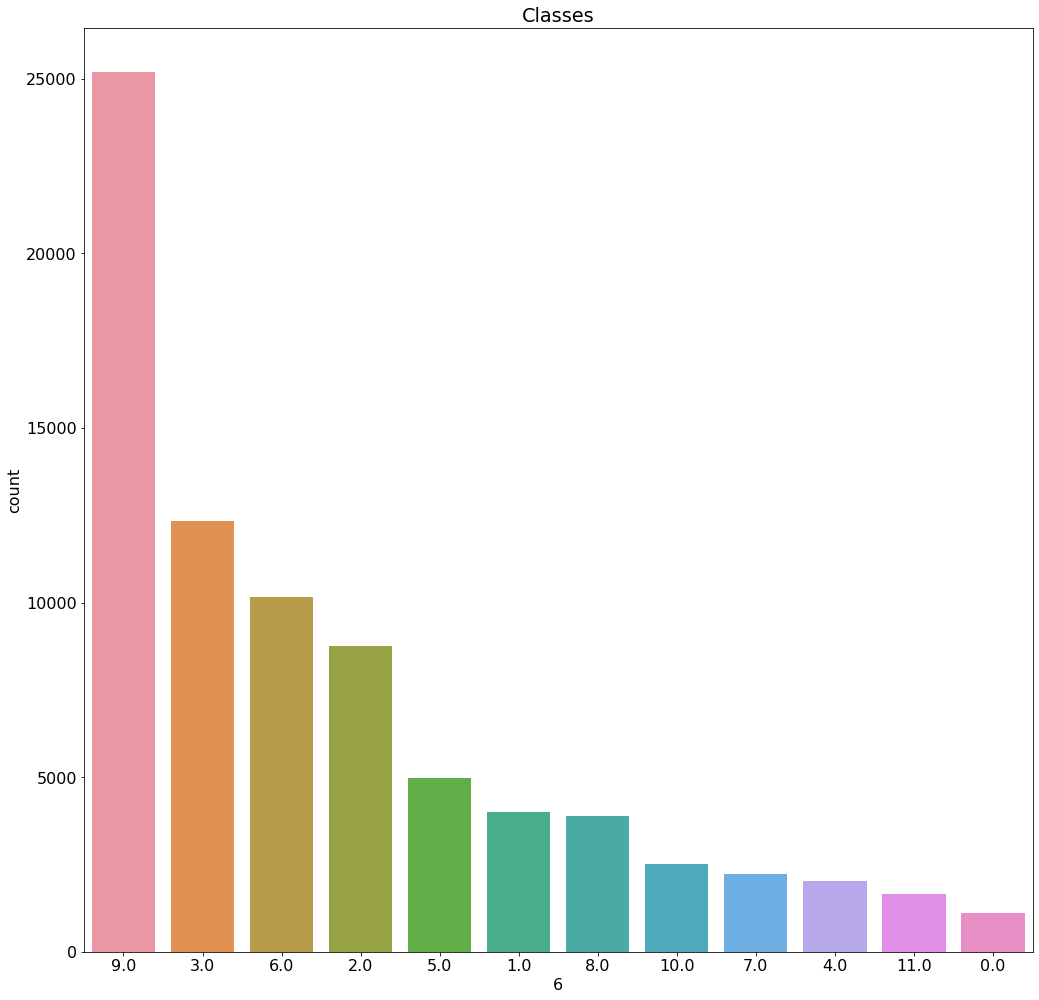

In [142]:
# Inspect activities timestamps
plt.figure(figsize=(17,17))
sns.countplot(x=6, data = df_train, order = df_train[6].value_counts().index)
plt.title('Classes')
plt.show()

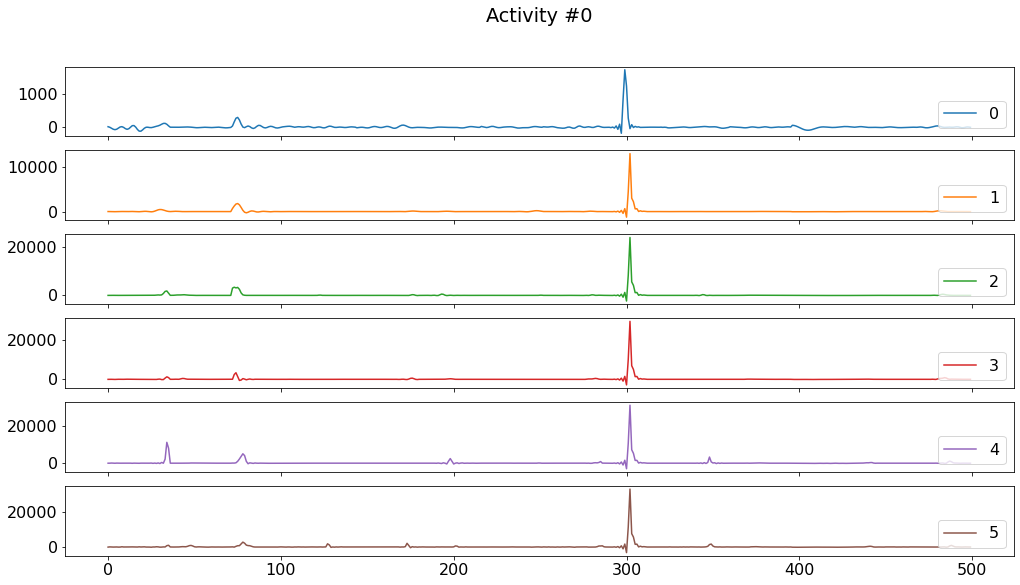

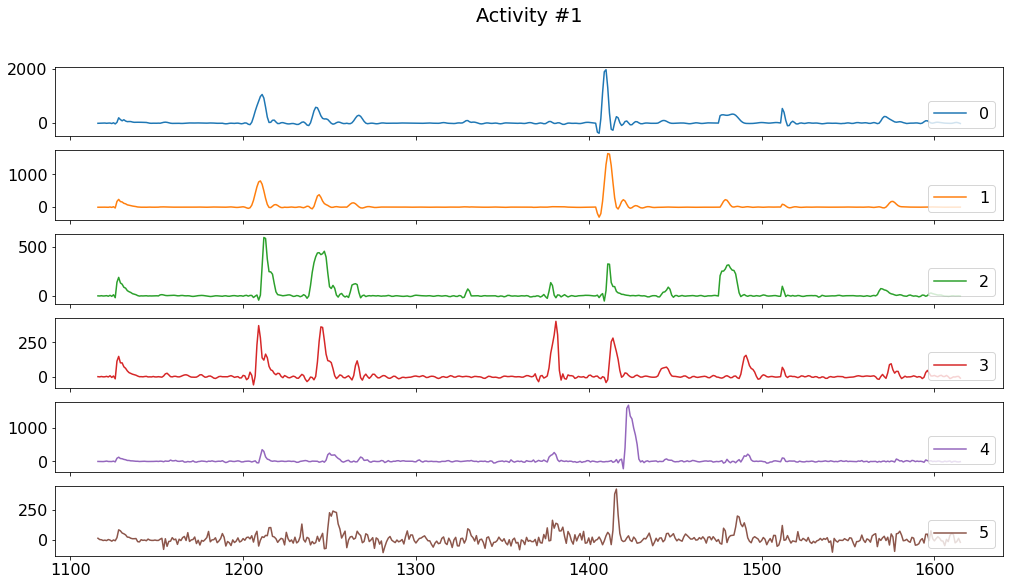

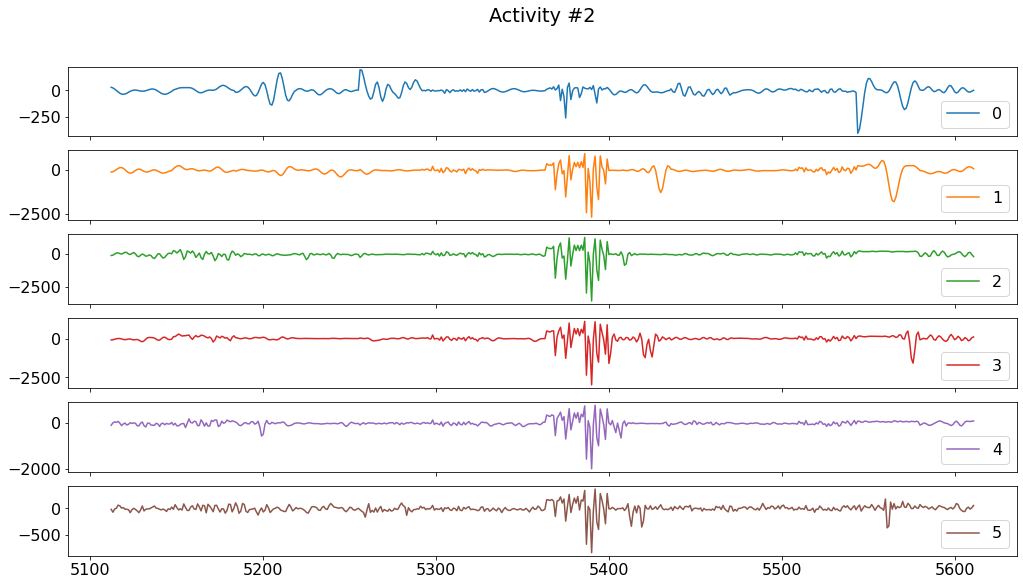

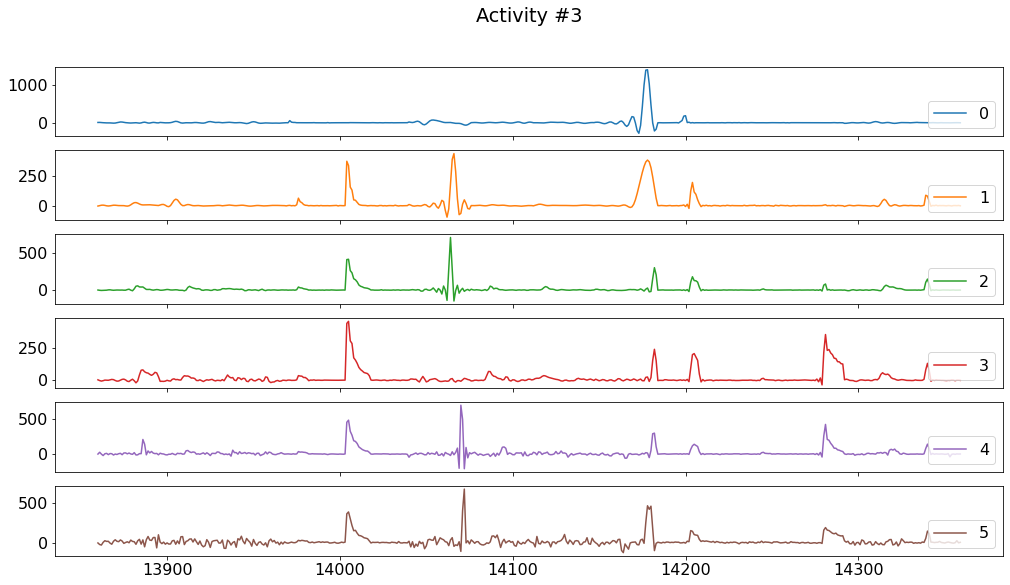

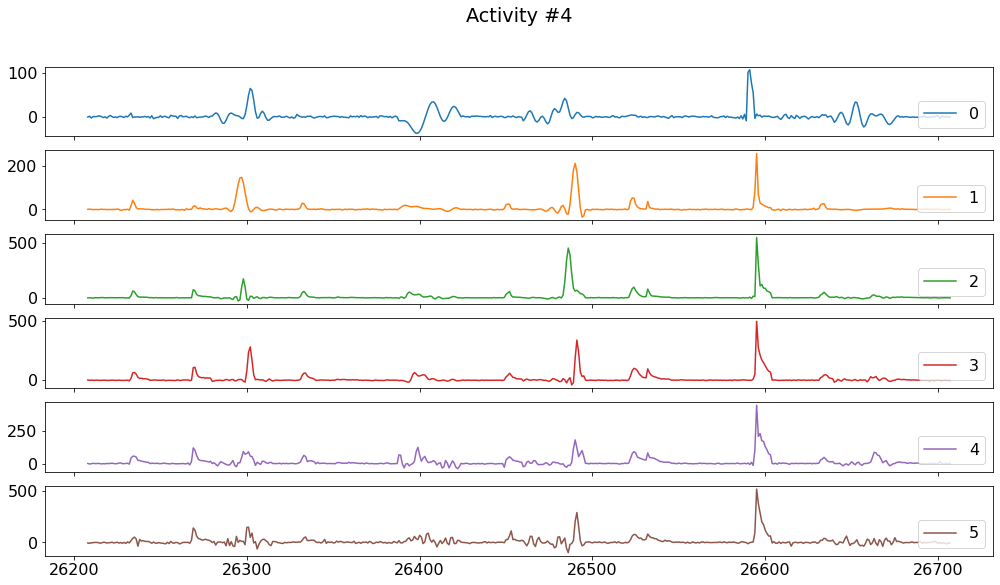

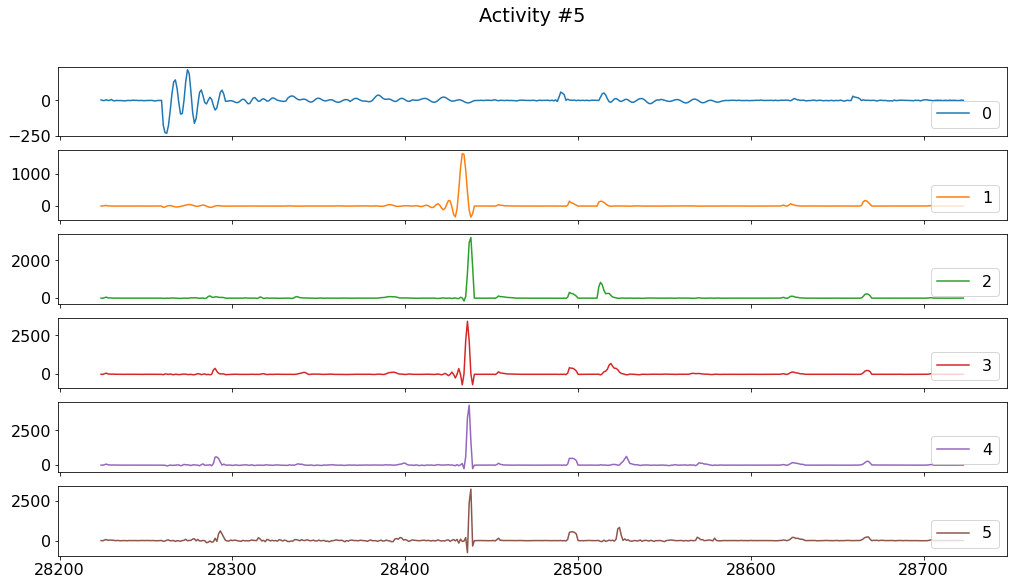

In [143]:
for activity in range(0,6):
    inspect_activity(activity, df_train)


**APPLY PREPROCESS TO TRAINING DATA**

In [144]:
# Apply RobustScaler to the useful features
scale_columns = [0, 1, 2, 3, 4, 5]
scaler = RobustScaler()
print(df_train[scale_columns].shape)
scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

(78840, 6)


In [145]:
window = 36
stride = 6

In [146]:
def build_sequences(df, window=200, stride=200):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    for id in range(classes):
        # Take only meaningful features
        temp = df[df[6] == id][[0, 1, 2, 3, 4, 5]].values
        # Save the label
        label = id
        # Compute padding length
        padding_len = window - len(temp)%window
        # Create padding and concatenate it
        padding = np.zeros((padding_len,6), dtype='float64')
        temp = np.concatenate((temp,padding))
        # Build features windows with their corresponging labels
        idx = 0
        while idx+window <= len(temp):
            dataset.append(temp[idx:idx+window])
            labels.append(label)
            idx += stride
    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

In [147]:
X_train, y_train = build_sequences(df_train, window, stride)
print(X_train.shape, y_train.shape)
X_test, y_test = build_sequences(df_test, window, stride)
print(X_test.shape, y_test.shape)

print(y_train)

(13152, 36, 6) (13152,)
(1446, 36, 6) (1446,)
[ 0  0  0 ... 11 11 11]


In [148]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [149]:
label_mapping={
    'Wish':0,
    'Another':1,
    'Comfortably':2,
    'Money':3,
    'Breathe':4,
     'Time':5,
     'Brain':6,
     'Echoes':7,
     'Wearing':8,
     'Sorrow':9,
     'Hey':10,
     'Shine':11,
 }


In [150]:
input_shape = X_train.shape[1:]
classes = y_train.shape[-1]
batch_size = 128
epochs = 200
print(input_shape)
print(classes)

(36, 6)
12


In [151]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13152, 36, 6), (13152, 12), (1446, 36, 6), (1446, 12))

**MODEL BASED ON RESNET ARCHITECTURE (OUR BEST MODEL)**

In [152]:
def build_ResNet_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn1 = tfkl.Conv1D(128,3,padding='same', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
    relu_layer1 = tfkl.ReLU()(cnn1)
    cnn2 = tfkl.Conv1D(128,3,padding='same', kernel_initializer = tfk.initializers.GlorotUniform(seed))(relu_layer1)
    relu_layer2 = tfkl.ReLU()(cnn2)
    cnn3 = tfkl.Conv1D(128,3,padding='same', kernel_initializer = tfk.initializers.GlorotUniform(seed))(relu_layer2)
    added = tfkl.Add()([cnn1,cnn3])
    relu_layer3 = tfkl.ReLU()(added)

    gap = tfkl.GlobalAveragePooling1D()(relu_layer3)
    dropout = tfkl.Dropout(.5, seed=seed)(gap)
    dense1 = tfkl.Dense(128, kernel_initializer = tfk.initializers.GlorotUniform(seed))(dropout)
    relu_denseLayer = tfkl.ReLU()(dense1)
    output_layer = tfkl.Dense(classes, kernel_initializer = tfk.initializers.GlorotUniform(seed), activation='softmax')(relu_denseLayer)
    
  
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

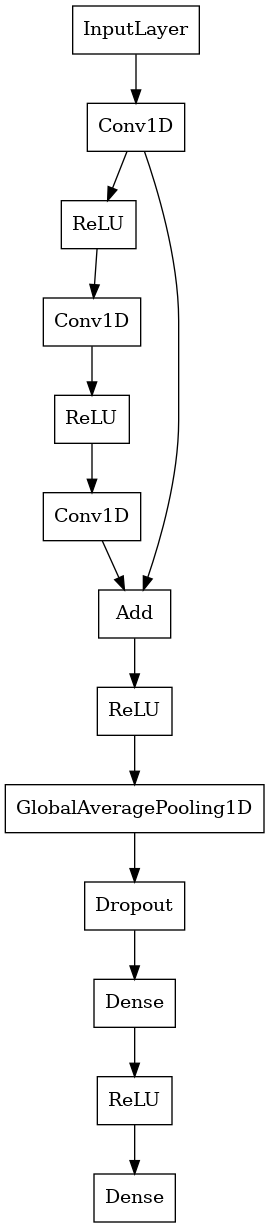

In [159]:
tfk.utils.plot_model(
    model,
    expand_nested=True,
    show_layer_names=False
)

**OUR ATTEMPT TO BUILD A NETWORK BASED ON BIDIRECTIONAL LSTM (THIS IS NOT OUR BEST MODEL)**

In [153]:
def build_BiLSTM_classifier(input_shape, classes,):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    #x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(input_layer)
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(input_layer)
    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(x)
    x = tfkl.Conv1D(256, 3, padding='same', activation='relu')(x)
    block_1_output = tfkl.MaxPool1D()(x)

    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(block_1_output)
    x = tfkl.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(x)
    x = tfkl.Conv1D(256, 3, activation='relu', padding='same')(x)
    block_2_output =  tfkl.Add()([x, block_1_output])

    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(block_2_output)
    x = tfkl.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(x)
    x = tfkl.Conv1D(256, 3, activation='relu', padding='same')(x)
    block_3_output = tfkl.Add()([x, block_2_output])

    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(block_3_output)
    x = tfkl.Conv1D(256, 3, padding='same', activation='relu')(x)
    x = tfkl.GlobalAveragePooling1D()(x)
    x = tfkl.Dense(256, activation='relu')(x)
    x = tfkl.Dropout(0.2, seed=seed)(x)
    output_layer = tfkl.Dense(classes, activation='softmax')(x)
    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(epsilon=1e-07), metrics='accuracy')

    # Return the model
    return model

In [154]:
model = build_ResNet_classifier(input_shape, classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 36, 6)]      0                                            
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 36, 128)      2432        Input[0][0]                      
__________________________________________________________________________________________________
re_lu_16 (ReLU)                 (None, 36, 128)      0           conv1d_12[0][0]                  
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 36, 128)      49280       re_lu_16[0][0]                   
______________________________________________________________________________________________

In [155]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    validation_data=(X_test,y_test),
    epochs = epochs,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
103/103 [==============================] - 1s 8ms/step - loss: 2.6527 - accuracy: 0.3358 - val_loss: 1.9025 - val_accuracy: 0.4530
Epoch 2/200
103/103 [==============================] - 1s 7ms/step - loss: 1.8075 - accuracy: 0.4381 - val_loss: 1.5429 - val_accuracy: 0.4869
Epoch 3/200
103/103 [==============================] - 1s 6ms/step - loss: 1.5911 - accuracy: 0.4860 - val_loss: 1.4730 - val_accuracy: 0.5408
Epoch 4/200
103/103 [==============================] - 1s 7ms/step - loss: 1.4747 - accuracy: 0.5249 - val_loss: 1.3886 - val_accuracy: 0.5622
Epoch 5/200
103/103 [==============================] - 1s 6ms/step - loss: 1.3511 - accuracy: 0.5570 - val_loss: 1.2647 - val_accuracy: 0.5947
Epoch 6/200
103/103 [==============================] - 1s 6ms/step - loss: 1.2780 - accuracy: 0.5763 - val_loss: 1.1666 - val_accuracy: 0.6183
Epoch 7/200
103/103 [==============================] - 1s 6ms/step - loss: 1.1940 - accuracy: 0.6042 - val_loss: 1.1591 - val_accuracy: 0.6307

In [156]:
model.save('ResNet')

In [157]:
predictions = model.predict(X_test)
predictions.shape

(1446, 12)

Accuracy: 0.7372
Precision: 0.7483
Recall: 0.6211
F1: 0.6412


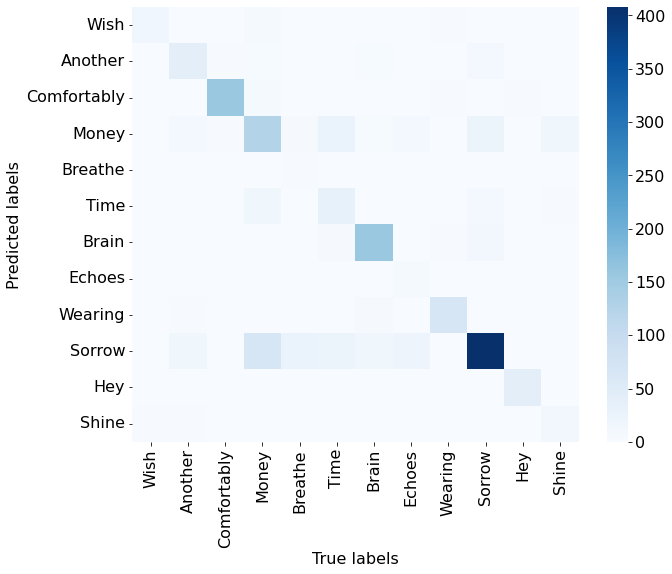

In [158]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()